# Grandient Boosting Classifier

<span>Gradient Boosting Trees follow the same type of logic as Random Forest Classifiers, instead of using one tree lets build a ensemble. The key differenc here is that instead building all the trees out ina mutually exculsive manner, lets instead build them out sequentially. Where each new tree tries to corret the errors for the last one</span>


In this notebook, I will be looking at the famous breastcancer dataset. This dataset is a multi-class classification problem, where I need to predict the correct target for each observation from a range of possible classes. We will attempt to predict the proper target class using this model, given the feature of each type of class, I often reuse this dataset between my tree-based notebooks. Using the same dataset makes it very easy to compare and contrast the performance of different tree-based models, and keep the trees a reasonable size. 

**Dataset** 

Breast Cancer Dataset: https://www.kaggle.com/hdza1991/breast-cancer-wisconsin-data-set

### Import Preliminaries

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
 
# Import modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn
import warnings

from sklearn.datasets import load_breast_cancer
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 3.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [5]:
# Import Breast Cancer data
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Conduct a train-test split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y)

# View the training dataframe
pd.DataFrame(train_x, columns=breast_cancer['feature_names']).head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.540,27.540,96.730,658.800,0.114,0.160,0.164,0.074,0.230,0.071,0.370,1.033,2.879,32.550,0.006,0.042,0.047,0.011,0.019,0.005,17.460,37.130,124.100,943.200,0.168,0.658,0.703,0.171,0.422,0.134
1,25.220,24.910,171.500,1878.000,0.106,0.267,0.334,0.184,0.183,0.068,0.897,1.474,7.382,120.000,0.008,0.057,0.057,0.020,0.011,0.006,30.000,33.620,211.700,2562.000,0.157,0.608,0.648,0.287,0.235,0.105
2,12.460,24.040,83.970,475.900,0.119,0.240,0.227,0.085,0.203,0.082,0.298,1.599,2.039,23.940,0.007,0.072,0.077,0.014,0.018,0.010,15.090,40.680,97.650,711.400,0.185,1.058,1.105,0.221,0.437,0.207
3,12.320,12.390,78.850,464.100,0.103,0.070,0.040,0.037,0.196,0.060,0.236,0.666,1.670,17.430,0.008,0.012,0.017,0.012,0.019,0.002,13.500,15.640,86.970,549.100,0.139,0.127,0.124,0.094,0.283,0.068
4,13.000,21.820,87.500,519.800,0.127,0.193,0.186,0.094,0.235,0.074,0.306,1.002,2.406,24.320,0.006,0.035,0.036,0.012,0.021,0.004,15.490,30.730,106.200,739.300,0.170,0.540,0.539,0.206,0.438,0.107


### Data Overview

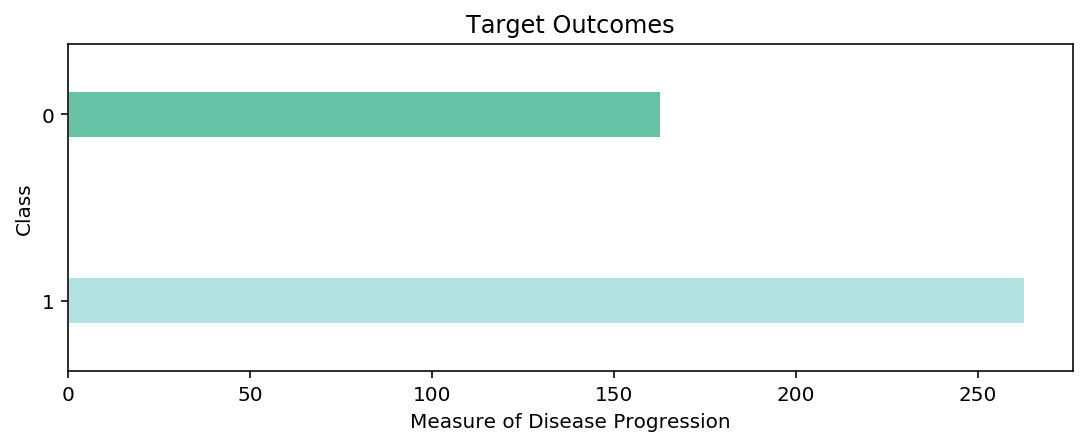

In [6]:
# Plot a barplot of the target clasees
pd.Series(train_y).value_counts().plot.barh(grid=False, color=['#B2E2E2','#66C2A4'], width=0.25,edgecolor='w')
plt.title('Target Outcomes')
plt.ylabel('Cl
           ass')
plt.xlabel('Measure of Disease Progression');

### Fit the Model

In [7]:
# Fit the intial model
gb_model =GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
gb_model.fit(train_x, train_y);

### Model Evaluation

##### Cross Validation Score

In [8]:
# View the cross validation score of the intial model
scores = cross_val_score(gb_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.96050


##### Confustion Matrix

In [9]:
# Training confusion matrix 
from sklearn.metrics import confusion_matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, gb_model.predict(train_x)))
cmatrix.index.name = 'class'

cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

prediction     
                      0    1
result class                
actual 0            163    0
       1              0  263

##### Feature Importance

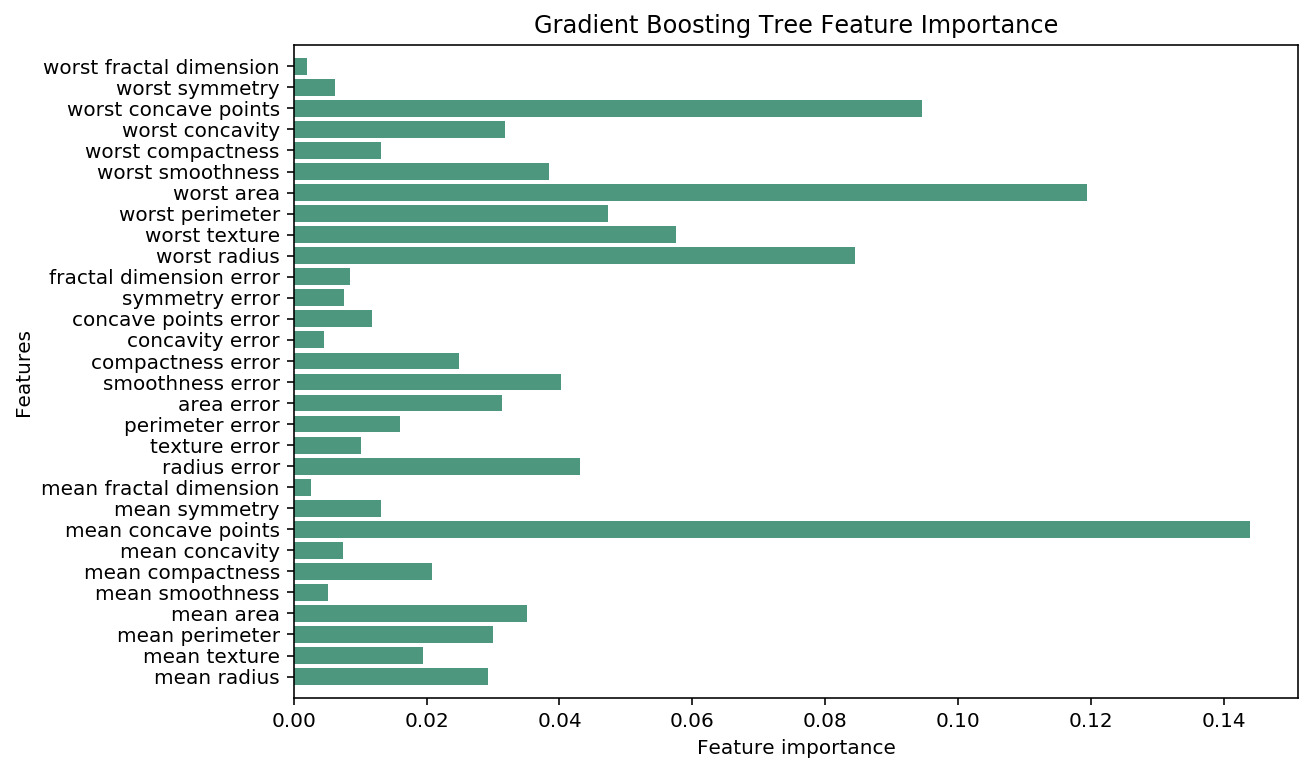

In [10]:
# Plot ensemble's feature importance
mpl.rcParams['figure.figsize'] = (9.0, 6.0)
n_features = breast_cancer.data.shape[1]
plt.barh(range(n_features), gb_model.feature_importances_, align='center', color='#4D977E')
plt.yticks(np.arange(n_features), breast_cancer.feature_names)
plt.title('Gradient Boosting Tree Feature Importance')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features);

##### Parameter Tuning

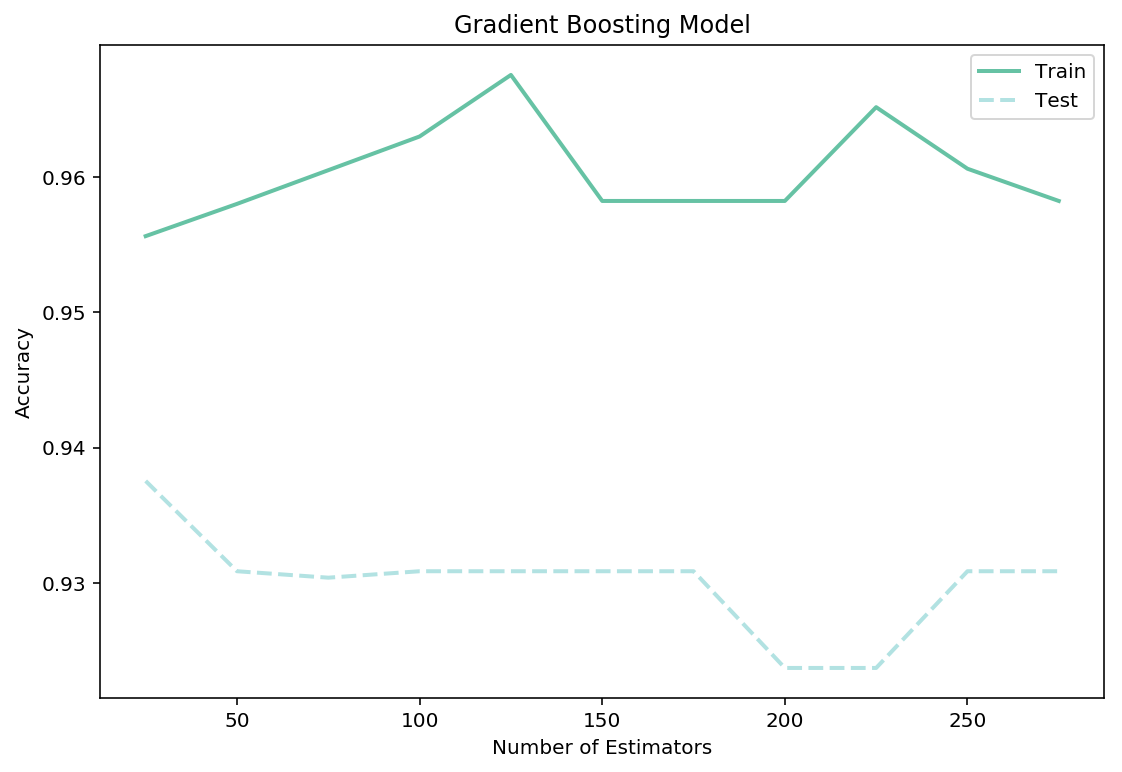

In [11]:
# Define paraameter range and score lists
n_estimators_range = np.arange(0,300, 25)[1:]
train_score = []
test_score = []

# Train a knn_model for every neighbour value in our list
for i in n_estimators_range:
    gb_model=GradientBoostingClassifier(n_estimators = i).fit(train_x,train_y)
    train_score.append(cross_val_score(gb_model, train_x, train_y, cv=10, scoring='accuracy').mean())
    test_score.append(cross_val_score(gb_model, test_x, test_y, cv=10, scoring='accuracy').mean())

# Plot our results
mpl.rcParams['figure.figsize'] = (9.0, 6.0)
plt.plot(n_estimators_range,train_score,label="Train",linewidth=2, color='#66C2A4') 
plt.plot(n_estimators_range,test_score,label="Test", linewidth=2,linestyle='--', color='#B2E2E2')
plt.legend()
plt.title('Gradient Boosting Model')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy');

##### Grid Searching Turnning

In [12]:
# Set up parameter grid
grid = {'learning_rate':np.arange(0.1,1.0,0.2),
        'n_estimators':np.arange(0,100, 25)[1:],
        'max_depth':list(range(2,30,4)),
        'max_features': list(range(2,30,2)),
        'max_leaf_nodes':[5,10,25,50,75,100]}

# Conduct gird search
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid, 
                     scoring='accuracy', n_jobs=-1, refit=True, cv=10,
                     return_train_score=True)
# Fit model
grid_search.fit(train_x,train_y);

NameError: name 'rf_model' is not defined

In [ ]:
print('Accuracy of best parameters: %.5f'%grid_search.best_score_)
print('Best parameters: %s' %grid_search.best_params_)

### Final Model

In [ ]:
# Fit the final model
gd_model = GradientBoostingClassifier(learning_rate = 0.5000000000000001, 
                                      max_depth=2, max_features=10, 
                                      max_leaf_nodes=50, n_estimators=50)
gd_model.fit(train_x, train_y)

# View the cross validation score of the intial model
scores = cross_val_score(gb_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

##### Confustion Matrix

In [ ]:
# Training confusion matix 
from sklearn.metrics import confusion_matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, gb_model.predict(train_x)))
cmatrix.index.name = 'class'

cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

##### Feature Importance

In [ ]:
# Plot ensembles's feature importance
n_features = breast_cancer.data.shape[1]
plt.barh(range(n_features),gb_model.feature_importances_, align='center', color='#4D977E')
plt.yticks(np.arange(n_features), breast_cancer.feature_names)
plt.title('Gradient Booosting Tree Feature  Importance')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features);

### Predict Results

In [ ]:
# Predict the results from our test data
pd.Series(rf_model.predict(test_x)).head(n=7)

### General Notes

- Gradient boosting tree often use shallow trees (weak learners)
- Each tree provides good predictions on a part of the data, so more trees improve performance
- A higher learning rate means that each tree can make more corrections meaning allowing for more complex models
- To pre-prune the tree lower the learning rate or reduce the max depth
- Moving to Gradient Boosting Trees lets you squeeze the last few percentages of accuracy

Author: Kavi Sekhon